<a href="https://colab.research.google.com/github/Roger90Br/churn-prediction-streaming/blob/main/Desafio_6_Escola_DNC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tratamento de Dados:

O tratamento de dados refere-se ao processo de preparação e limpeza de conjuntos de dados brutos para análise. Isso inclui remover dados ausentes, tratar valores nulos, converter tipos de dados, normalizar ou padronizar variáveis, e transformar dados categóricos em formatos que possam ser utilizados por algoritmos de aprendizado de máquina.

In [ ]:
import pandas as pd
from google.colab import drive

# Montar o Google Drive
drive.mount('/content/drive')

# Carregar o arquivo CSV em um DataFrame
file_path = '/streaming_data.csv'
df = pd.read_csv(file_path)

# Substituir valores "NaN" por 0 nas colunas especificadas
cols_to_fill = ['Time_on_platform', 'Num_streaming_services', 'Churned', 'Avg_rating', 'Devices_connected']
df[cols_to_fill] = df[cols_to_fill].fillna(0)

# Dropar linhas que contêm valores nulos nas colunas especificadas
df = df.dropna(subset=['Gender', 'Subscription_type', 'Age'])

# Transformar valores churned 0 e 1 por No e Yes usando .loc
df.loc[:, 'Churned'] = df['Churned'].replace({0: 'No', 1: 'Yes'})

# Transformar valores floats em valores inteiros nas colunas especificadas usando .loc
cols_to_int = ['Time_on_platform', 'Num_streaming_services', 'Avg_rating', 'Devices_connected']
df.loc[:, cols_to_int] = df[cols_to_int].astype(int)

# Salvar o DataFrame tratado no Google Drive
df.to_csv('/content/drive/My Drive/streaming_data_tratado.csv', index=False)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Carregar o arquivo tratado do Google Drive
df_tratado = pd.read_csv('/content/drive/My Drive/streaming_data_tratado.csv')

# Visualizar informações sobre o DataFrame final
print("\nInformações sobre o DataFrame final:")
df_tratado.info()

# Exibir as 10 primeiras linhas do DataFrame final
print("\nPrimeiras 10 linhas do DataFrame final:")
print(df_tratado.head(10))



Informações sobre o DataFrame final:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36515 entries, 0 to 36514
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     36515 non-null  float64
 1   Gender                  36515 non-null  object 
 2   Time_on_platform        36515 non-null  float64
 3   Devices_connected       36515 non-null  float64
 4   Subscription_type       36515 non-null  object 
 5   Num_streaming_services  36515 non-null  float64
 6   Num_active_profiles     36515 non-null  int64  
 7   Avg_rating              36515 non-null  float64
 8   Churned                 36515 non-null  object 
 9   User_id                 36515 non-null  object 
dtypes: float64(5), int64(1), object(4)
memory usage: 2.8+ MB

Primeiras 10 linhas do DataFrame final:
    Age  Gender  Time_on_platform  Devices_connected Subscription_type  \
0  49.0    Male            4700.0       

Regressão Linear:

A regressão linear é uma técnica estatística usada para entender a relação entre variáveis independentes (preditoras) e uma variável dependente (alvo). Ela modela essa relação linearmente, o que permite prever valores futuros da variável dependente com base nas variáveis independentes.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<Figure size 800x600 with 0 Axes>

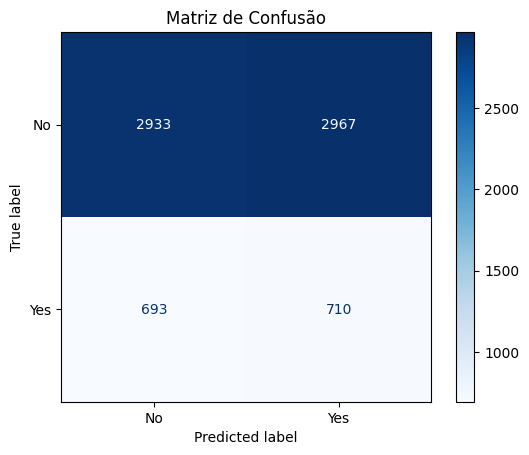

Relatório de classificação:
              precision    recall  f1-score   support

          No       0.81      0.50      0.62      5900
         Yes       0.19      0.51      0.28      1403

    accuracy                           0.50      7303
   macro avg       0.50      0.50      0.45      7303
weighted avg       0.69      0.50      0.55      7303



In [ ]:
import pandas as pd
from google.colab import drive
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Montar o Google Drive
drive.mount('/content/drive')

# Carregar o arquivo tratado do Google Drive
file_path = '/content/drive/My Drive/streaming_data_tratado.csv'
df = pd.read_csv(file_path)

# Definir X e y
X = df.drop('Churned', axis=1)
y = df['Churned']

# Aplicar LabelEncoder em variáveis categóricas
le = LabelEncoder()
for col in X.select_dtypes(include='object').columns:
    X[col] = le.fit_transform(X[col])

# Escalonar os dados com MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Balanceamento das classes usando SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Criar e treinar o modelo de Regressão Logística
model = LogisticRegression()
model.fit(X_train_balanced, y_train_balanced)

# Realizar previsões no conjunto de teste
y_pred = model.predict(X_test)

# Plotar matriz de confusão
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusão')
plt.show()

# Imprimir métricas de classificação
print("Relatório de classificação:")
print(classification_report(y_test, y_pred))

Tuning (Ajuste de Hiperparâmetros):

O tuning refere-se ao processo de ajustar os hiperparâmetros de um modelo de aprendizado de máquina para otimizar seu desempenho. Isso é feito procurando a melhor combinação de valores para os parâmetros que não são aprendidos diretamente durante o treinamento do modelo.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<Figure size 800x600 with 0 Axes>

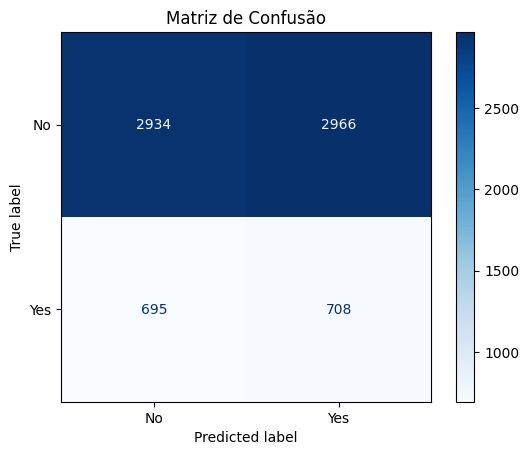

Melhores parâmetros encontrados:  {'C': 0.1, 'solver': 'liblinear'}
              precision    recall  f1-score   support

          No       0.81      0.50      0.62      5900
         Yes       0.19      0.50      0.28      1403

    accuracy                           0.50      7303
   macro avg       0.50      0.50      0.45      7303
weighted avg       0.69      0.50      0.55      7303



In [ ]:
import pandas as pd
from google.colab import drive
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Montar o Google Drive
drive.mount('/content/drive')

# Carregar o arquivo tratado do Google Drive
file_path = '/content/drive/My Drive/streaming_data_tratado.csv'
df = pd.read_csv(file_path)

# Definir X e y
X = df.drop('Churned', axis=1)
y = df['Churned']

# Aplicar LabelEncoder em variáveis categóricas
le = LabelEncoder()
for col in X.select_dtypes(include='object').columns:
    X[col] = le.fit_transform(X[col])

# Escalonar os dados com MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Balanceamento das classes usando SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Definir os hiperparâmetros para tunning
param_grid = {
    'C': [0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear']
}

# Criar e realizar o tunning do modelo de Regressão Logística com GridSearchCV
model = LogisticRegression()
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_balanced, y_train_balanced)

# Melhor modelo após tunning
best_model = grid_search.best_estimator_

# Realizar previsões no conjunto de teste
y_pred = best_model.predict(X_test)

# Plotar matriz de confusão
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusão')
plt.show()

# Imprimir métricas de classificação
print("Melhores parâmetros encontrados: ", grid_search.best_params_)
print(classification_report(y_test, y_pred))


Random Forest:

Random Forest é um algoritmo de aprendizado de máquina que opera construindo múltiplas árvores de decisão durante o treinamento e combinando suas previsões para melhorar a precisão e a robustez do modelo. Cada árvore é treinada em uma amostra aleatória do conjunto de dados e usa um subconjunto aleatório das variáveis, resultando em um modelo forte contra overfitting e capaz de lidar com dados não lineares e com múltiplas características.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Fitting 3 folds for each of 16 candidates, totalling 48 fits


<Figure size 800x600 with 0 Axes>

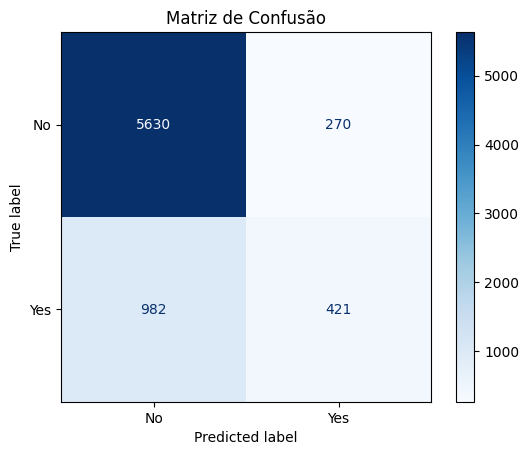

Relatório de classificação:
              precision    recall  f1-score   support

          No       0.85      0.95      0.90      5900
         Yes       0.61      0.30      0.40      1403

    accuracy                           0.83      7303
   macro avg       0.73      0.63      0.65      7303
weighted avg       0.80      0.83      0.80      7303

Melhores parâmetros encontrados: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [ ]:
import pandas as pd
from google.colab import drive
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Montar o Google Drive
drive.mount('/content/drive')

# Carregar o arquivo tratado do Google Drive
file_path = '/content/drive/My Drive/streaming_data_tratado.csv'
df = pd.read_csv(file_path)

# Definir X e y
X = df.drop('Churned', axis=1)
y = df['Churned']

# Aplicar LabelEncoder em variáveis categóricas
le = LabelEncoder()
for col in X.select_dtypes(include='object').columns:
    X[col] = le.fit_transform(X[col])

# Escalonar os dados com MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Balanceamento das classes usando SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Definir o modelo de Random Forest
rf = RandomForestClassifier(random_state=42)

# Definir os parâmetros para o Grid Search
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Realizar o Grid Search com validação cruzada
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train_balanced, y_train_balanced)

# Melhor estimador encontrado pelo Grid Search
best_rf = grid_search.best_estimator_

# Realizar previsões no conjunto de teste
y_pred = best_rf.predict(X_test)

# Plotar matriz de confusão
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_rf.classes_)
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusão')
plt.show()

# Imprimir métricas de classificação
print("Relatório de classificação:")
print(classification_report(y_test, y_pred))

# Exibir os melhores parâmetros
print("Melhores parâmetros encontrados:", grid_search.best_params_)
